In [10]:
# notebook to illustrate text indexing and relevance scoring

In [11]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [13]:
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/simple_test/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/clinton_emails/txt/", text_filename_pattern="C0*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/shakespeare_macbeth/txt/", text_filename_pattern="macbeth_act_0?_scene_0?.txt")

content_directory =  data_sets/simple_test/txt/
text_filename_pattern =  ??.txt
self.documents populated =  5


In [14]:
# first clear wordcount and relevance indices
tmt.index_wordcount.delete_index(cr.content_directory)
tmt.index_relevance.delete_index(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    c = tmt.text_processing.keep_only_alphanumeric(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)
    
    # build n-grams
    #gl = tmt.word_processing.build_ngrams_from_words(dl,2)

    # remove stop words
    #el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # update index
    tmt.index_wordcount.create_wordcount_index_for_document(cr.content_directory, document_name, dl)
    pass


removed wordcount index file:  data_sets/simple_test/txt/index_wordcount.hdf5
removed relevance index file:  data_sets/simple_test/txt/index_relevance.hdf5
processing  01.txt
processing  02.txt
processing  03.txt
processing  04.txt
processing  05.txt


In [15]:
# merge document indices into a corpus index
tmt.index_wordcount.merge_wordcount_indices_for_corpus(cr.content_directory)

saving corpus word count index ...  data_sets/simple_test/txt/index_wordcount.hdf5


In [16]:
tmt.index_relevance.calculate_relevance_index(cr.content_directory)

saving corpus relevance index ...  data_sets/simple_test/txt/index_relevance.hdf5


In [17]:
words_by_relevance = tmt.index_relevance.get_words_by_relevance(cr.content_directory)
# 20 most common
words_by_relevance[:20]

wheels    0.333462
orange    0.325522
seats     0.304638
apple     0.261118
kiwi      0.177076
banana    0.083365
the       0.000000
dtype: float64

In [18]:
# 20 least common
words_by_relevance[-20:]

wheels    0.333462
orange    0.325522
seats     0.304638
apple     0.261118
kiwi      0.177076
banana    0.083365
the       0.000000
dtype: float64

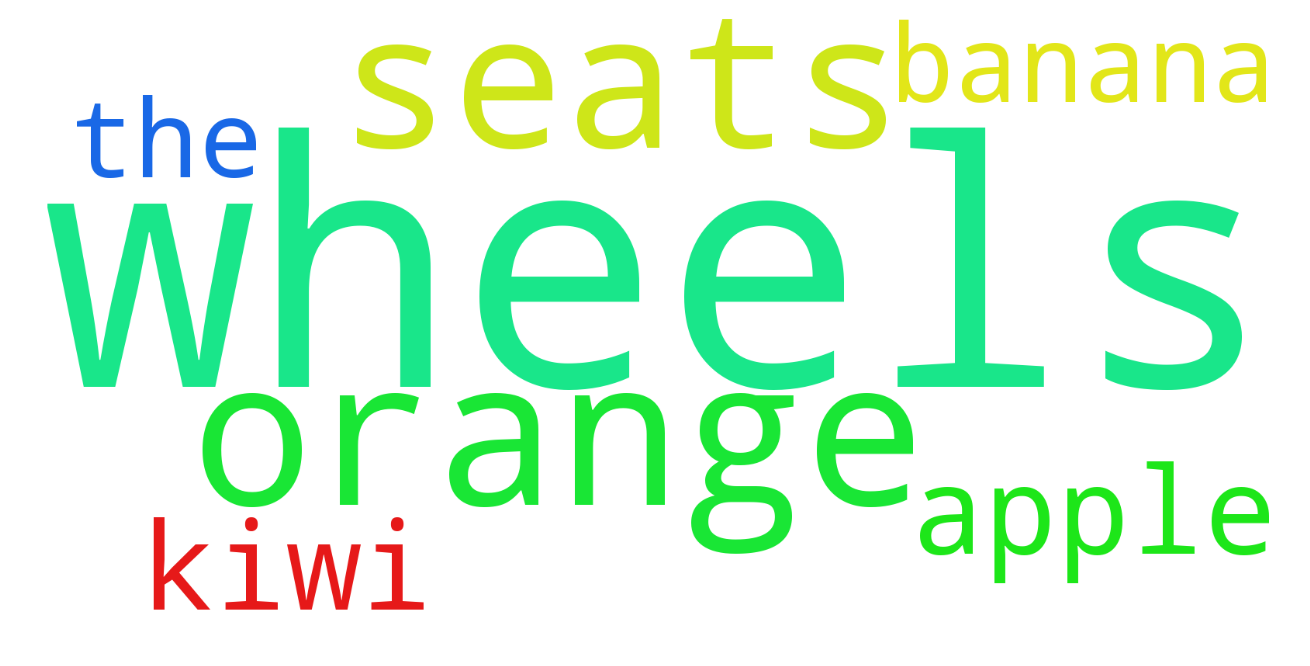

In [19]:
# visualise most relevance words
tmt.visualisation.plot_wordcloud(words_by_relevance)